# Logistic Regression: Fitting a Sigmoid to Data

This notebook demonstrates the intuition and step-by-step implementation of Logistic Regression using **Gradient Descent** based on **Maximum Likelihood Estimation (MLE)**.
We will use a simple dataset (`Age` vs `Claim`) to fit a sigmoid curve manually and observe the impact of optimization.


This notebook demonstrates how **logistic regression** fits a classification problem  
using **gradient descent** from scratch — without `sklearn` or `statsmodels`.

We will:
- Use one feature: `Age`
- Normalize the data
- Implement the **sigmoid function**
- Define the **binary cross-entropy loss**
- Derive and apply gradients step-by-step
- Compare the convergence of normalize vs raw 
- Plot results


## 📥 Step 1: Load and Visualize Data

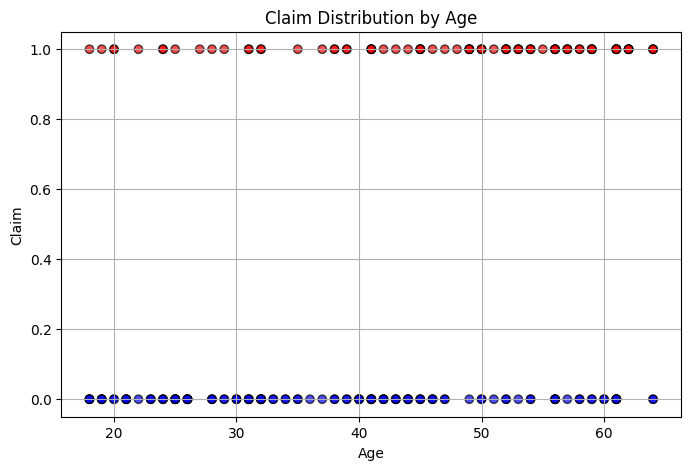

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and manually normalize
df = pd.read_csv("data/Insurance_Claim_Dataset.csv")
age_mean = df["Age"].mean()
age_std = df["Age"].std()
df["Age_manual_norm"] = (df["Age"] - age_mean) / age_std

X_norm = df["Age_manual_norm"].values
X_raw = df["Age"].values
y = df["Claim"].values

plt.figure(figsize=(8, 5))
plt.scatter(X_raw, y, c=y, cmap='bwr', edgecolors='k', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Claim")
plt.title("Claim Distribution by Age")
plt.grid(True)
plt.show()

## Step 2: Define Sigmoid and Cost Function (Log Loss)

We use the **log-likelihood** formulation as our cost function. Maximizing the likelihood is equivalent to minimizing the **log loss**.


The sigmoid function maps any real number to a value between 0 and 1:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

We use this to convert the logit (linear combination of weights) into a probability.

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


The objective is to minimize the **binary cross-entropy** loss:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})\right]
$$

Where:
- $\hat{y}^{(i)} = \sigma(\theta_0 + \theta_1 x^{(i)})$


In [3]:
def compute_cost(theta_0, theta_1, X, y):
    m = len(y)
    z = theta_0 + theta_1 * X
    h = np.clip(sigmoid(z), 1e-5, 1 - 1e-5)
    return -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

## Step 3: Gradient Descent (MLE)

We update weights to **maximize likelihood** (or equivalently, minimize negative log-likelihood).


To minimize the cost, we compute the gradient:

1. Gradient with respect to $\theta_0$ (bias):

$$
\frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum (\hat{y}_i - y_i)
$$

2. Gradient with respect to $\theta_1$ (weight for Age):

$$
\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum (\hat{y}_i - y_i) \cdot x_i
$$


In [4]:
def gradient_descent(X, y, lr=0.001, epochs=50000):
    m = len(y)
    theta_0, theta_1 = 0.0, 0.0
    cost_history = []

    for epoch in range(epochs):
        total_grad_0 = 0.0
        total_grad_1 = 0.0
        cost = 0.0

        for i in range(m):
            x_i = X[i]
            y_i = y[i]
            z = theta_0 + theta_1 * x_i
            h = 1 / (1 + np.exp(-z))  # sigmoid

            error = h - y_i
            total_grad_0 += error
            total_grad_1 += error * x_i

            # manual cost log loss
            cost += -y_i * np.log(h + 1e-10) - (1 - y_i) * np.log(1 - h + 1e-10)

        theta_0 -= lr * total_grad_0 / m
        theta_1 -= lr * total_grad_1 / m
        cost_history.append(cost / m)

        if epoch % 1000 == 0:
            print(f"Epoch {epoch:4d}: Cost = {cost / m:.5f}, theta_0 = {theta_0:.5f}, theta_1 = {theta_1:.5f}")

    return theta_0, theta_1, cost_history


### Step 4a: Sigmoid Line (Manually Normalized Age)

Epoch    0: Cost = 0.69315, theta_0 = -0.00010, theta_1 = 0.00016
Epoch 1000: Cost = 0.66577, theta_0 = -0.08860, theta_1 = 0.13942
Epoch 2000: Cost = 0.64901, theta_0 = -0.15783, theta_1 = 0.24843
Epoch 3000: Cost = 0.63858, theta_0 = -0.21245, theta_1 = 0.33443
Epoch 4000: Cost = 0.63198, theta_0 = -0.25596, theta_1 = 0.40285
Epoch 5000: Cost = 0.62772, theta_0 = -0.29094, theta_1 = 0.45774
Epoch 6000: Cost = 0.62494, theta_0 = -0.31931, theta_1 = 0.50210
Epoch 7000: Cost = 0.62309, theta_0 = -0.34246, theta_1 = 0.53817
Epoch 8000: Cost = 0.62186, theta_0 = -0.36148, theta_1 = 0.56766
Epoch 9000: Cost = 0.62102, theta_0 = -0.37716, theta_1 = 0.59188
Epoch 10000: Cost = 0.62045, theta_0 = -0.39015, theta_1 = 0.61185
Epoch 11000: Cost = 0.62006, theta_0 = -0.40095, theta_1 = 0.62836
Epoch 12000: Cost = 0.61979, theta_0 = -0.40995, theta_1 = 0.64205
Epoch 13000: Cost = 0.61961, theta_0 = -0.41746, theta_1 = 0.65342
Epoch 14000: Cost = 0.61948, theta_0 = -0.42374, theta_1 = 0.66289
Epoch

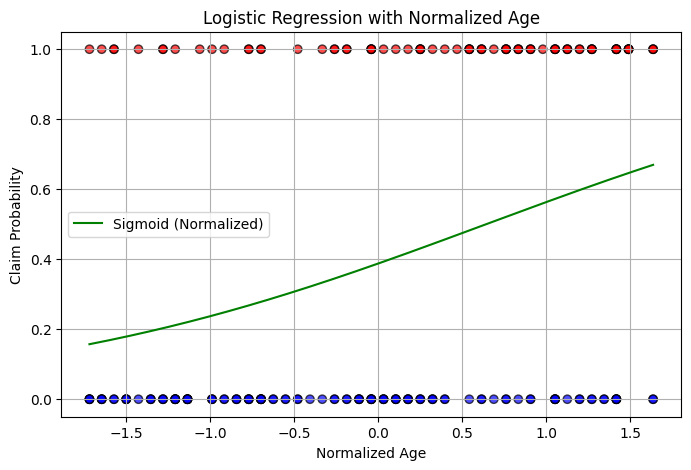

In [5]:
theta_0_n, theta_1_n, cost_n = gradient_descent(X_norm, y)
x_range = np.linspace(X_norm.min(), X_norm.max(), 200)
z = theta_0_n + theta_1_n * x_range
sigmoid_probs = sigmoid(z)

plt.figure(figsize=(8, 5))
plt.scatter(X_norm, y, c=y, cmap='bwr', edgecolors='k', alpha=0.7)
plt.plot(x_range, sigmoid_probs, color='green', label='Sigmoid (Normalized)')
plt.xlabel("Normalized Age")
plt.ylabel("Claim Probability")
plt.title("Logistic Regression with Normalized Age")
plt.legend()
plt.grid(True)
plt.show()

### Step 4b: Sigmoid Line (Raw Age)

Epoch    0: Cost = 0.69315, theta_0 = -0.00010, theta_1 = -0.00200
Epoch 1000: Cost = 0.68583, theta_0 = -0.05601, theta_1 = -0.00298
Epoch 2000: Cost = 0.68286, theta_0 = -0.11053, theta_1 = -0.00179
Epoch 3000: Cost = 0.68003, theta_0 = -0.16375, theta_1 = -0.00064
Epoch 4000: Cost = 0.67733, theta_0 = -0.21569, theta_1 = 0.00049
Epoch 5000: Cost = 0.67476, theta_0 = -0.26639, theta_1 = 0.00159
Epoch 6000: Cost = 0.67230, theta_0 = -0.31588, theta_1 = 0.00266
Epoch 7000: Cost = 0.66997, theta_0 = -0.36420, theta_1 = 0.00371
Epoch 8000: Cost = 0.66774, theta_0 = -0.41136, theta_1 = 0.00473
Epoch 9000: Cost = 0.66562, theta_0 = -0.45741, theta_1 = 0.00573
Epoch 10000: Cost = 0.66360, theta_0 = -0.50237, theta_1 = 0.00670
Epoch 11000: Cost = 0.66167, theta_0 = -0.54627, theta_1 = 0.00765
Epoch 12000: Cost = 0.65983, theta_0 = -0.58914, theta_1 = 0.00858
Epoch 13000: Cost = 0.65808, theta_0 = -0.63100, theta_1 = 0.00949
Epoch 14000: Cost = 0.65641, theta_0 = -0.67189, theta_1 = 0.01037
E

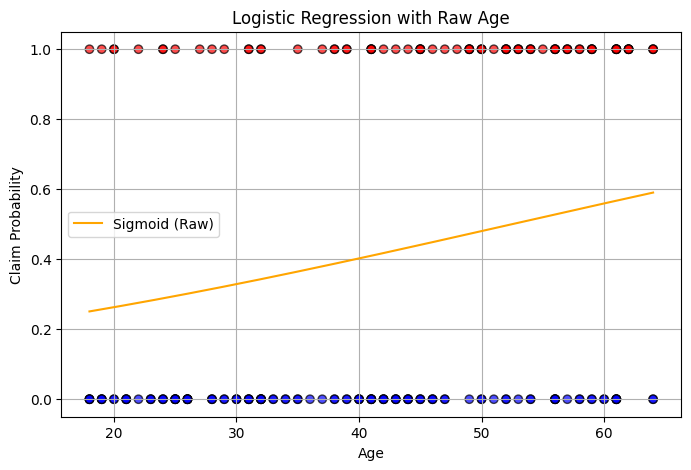

In [6]:
theta_0_r, theta_1_r, cost_r = gradient_descent(X_raw, y)
x_range = np.linspace(X_raw.min(), X_raw.max(), 200)
z = theta_0_r + theta_1_r * x_range
sigmoid_probs = sigmoid(z)

plt.figure(figsize=(8, 5))
plt.scatter(X_raw, y, c=y, cmap='bwr', edgecolors='k', alpha=0.7)
plt.plot(x_range, sigmoid_probs, color='orange', label='Sigmoid (Raw)')
plt.xlabel("Age")
plt.ylabel("Claim Probability")
plt.title("Logistic Regression with Raw Age")
plt.legend()
plt.grid(True)
plt.show()

### Step 5: Loss Curve Comparison

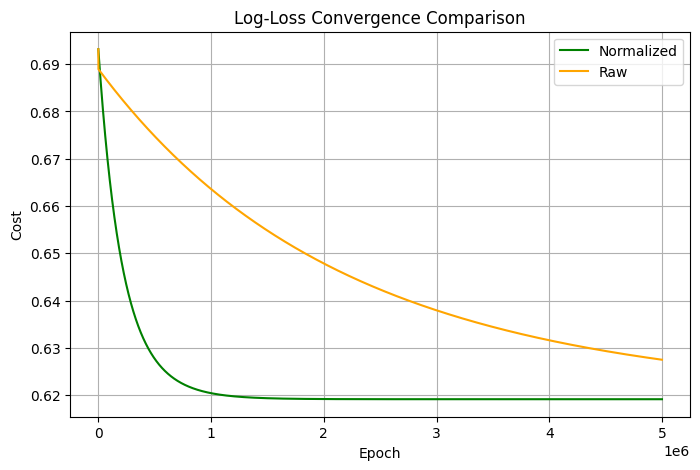

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(0, len(cost_n)*100, 100), cost_n, label="Normalized", color="green")
plt.plot(np.arange(0, len(cost_r)*100, 100), cost_r, label="Raw", color="orange")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Log-Loss Convergence Comparison")
plt.legend()
plt.grid(True)
plt.show()